# Scratch with loaded model

In [1]:
from copy import deepcopy
from pathlib import Path
import torch

from twm.replay_buffer import ReplayBuffer
from twm.config import CONFIGS

## Load

In [2]:
# get the latest save
saves = list(Path('../wandb/').glob('**/agent_*.pt'))
# saves = sorted(saves, key=lambda x: x.stat().st_mtime)

print(saves)
save = saves[-1]

# save = Path('../wandb/run-20240601_113918-ctz0yebk/files/files/agent_final.pt')
save


[PosixPath('../wandb/run-20240601_210820-jnc0zpm3/files/agent_0.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/agent_30000.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/agent_50000.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/agent_40000.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/agent_20000.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/agent_final.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/agent_10000.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/agent_0.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/files/agent_30000.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/files/agent_50000.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/files/agent_40000.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/files/agent_20000.pt'), PosixPath('../wandb/run-20240601_075812-0l0foh9u/files/files/agent_final.pt'), PosixPath('../wandb/run-2024

PosixPath('../wandb/run-20240601_204428-qql43soz/files/files/agent_0.pt')

In [28]:
import pandas as pd
d = [dict(f=f, date=f.stat().st_mtime, date2=str(f.parent).split('/')[2].split('-')[1]) for f in saves]
df = pd.DataFrame(d)
df

,f,date,date2
0,../wandb/run-20240601_210820-jnc0zpm3/files/ag...,1.717247e+09,20240601_210820
1,../wandb/run-20240601_075812-0l0foh9u/files/ag...,1.717200e+09,20240601_075812
2,../wandb/run-20240601_075812-0l0foh9u/files/ag...,1.717200e+09,20240601_075812
3,../wandb/run-20240601_075812-0l0foh9u/files/ag...,1.717200e+09,20240601_075812
4,../wandb/run-20240601_075812-0l0foh9u/files/ag...,1.717200e+09,20240601_075812
5,../wandb/run-20240601_075812-0l0foh9u/files/ag...,1.717201e+09,20240601_075812
6,../wandb/run-20240601_075812-0l0foh9u/files/ag...,1.717200e+09,20240601_075812
7,../wandb/run-20240601_075812-0l0foh9u/files/ag...,1.717200e+09,20240601_075812
8,../wandb/run-20240601_075812-0l0foh9u/files/fi...,1.717200e+09,20240601_075812
9,../wandb/run-20240601_075812-0l0foh9u/files/fi...,1.717200e+09,20240601_075812


In [4]:
state = torch.load(save)
print(state.keys())
config = state['config']
config['model_device'] = 'cpu'
config

dict_keys(['config', 'state_dict'])


{'buffer_capacity': 200000,
 'buffer_temperature': 20.0,
 'buffer_prefill': 20000,
 'train_it_budget': 3000000,
 'pretrain_it_budget': 20000000,
 'pretrain_obs_p': 0.4,
 'pretrain_dyn_p': 0.6,
 'save_every': 100000,
 'eval_every': 25000,
 'eval_episodes': 10,
 'final_eval_episodes': 100,
 'env_step_budget': 1000000,
 'env_frame_size': 8268,
 'env_frame_stack': 2,
 'env_time_limit': 10000,
 'env_discount_factor': 0.99,
 'env_discount_lambda': 0.95,
 'wm_batch_size': 800,
 'wm_sequence_length': 16,
 'wm_train_steps': 1,
 'wm_memory_length': 16,
 'wm_discount_threshold': 0.1,
 'z_categoricals': 64,
 'z_categories': 64,
 'obs_act': 'silu',
 'obs_norm': 'none',
 'obs_dropout': 0,
 'obs_lr': 0.0001,
 'obs_wd': 1e-06,
 'obs_eps': 1e-05,
 'obs_grad_clip': 100,
 'obs_entropy_coef': 5,
 'obs_entropy_threshold': 0.1,
 'obs_consistency_coef': 0.01,
 'obs_decoder_coef': 1,
 'dyn_embed_dim': 256,
 'dyn_num_heads': 4,
 'dyn_num_layers': 10,
 'dyn_feedforward_dim': 1024,
 'dyn_head_dim': 64,
 'dyn_z_d

In [4]:
from twm.trainer import Trainer
trainer = Trainer(config)
trainer.agent.load_state_dict(state['state_dict'])
trainer.agent.eval()
agent = trainer.agent
agent

/media/wassname/SGIronWolf/projects5/worldmodels/twm_llm/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Loading textures from cache


Agent(
  (wm): WorldModel(
    (obs_model): ObservationModel(
      (encoder): Sequential(
        (0): Flatten(start_dim=1, end_dim=-1)
        (1): MLP(
          (act): SiLU()
          (linear1): Linear(in_features=16536, out_features=512, bias=True)
          (linear2): Linear(in_features=512, out_features=512, bias=True)
          (linear3): Linear(in_features=512, out_features=4096, bias=True)
        )
      )
      (decoder): Sequential(
        (0): MLP(
          (act): SiLU()
          (linear1): Linear(in_features=4096, out_features=512, bias=True)
          (linear2): Linear(in_features=512, out_features=512, bias=True)
          (linear3): Linear(in_features=512, out_features=16536, bias=True)
        )
        (1): Unflatten(dim=1, unflattened_size=(2, 8268))
      )
    )
    (dyn_model): DynamicsModel(
      (prediction_net): PredictionNet(
        (embeds): ModuleDict(
          (z): MLP(
            (act): SiLU()
            (linear1): Linear(in_features=4096, out_f

In [5]:
env = trainer._create_env_from_config(config)
o,_  = env.reset()

In [6]:
# it's pretty sparse
(o>0).sum()

tensor(616)

In [7]:
o.shape

torch.Size([2, 8268])

In [8]:
from twm.agent import Agent, Dreamer
dreamer = Dreamer(
    config, agent.wm, mode="observe", ac=agent.ac, store_data=False
)
dreamer.observe_reset_single(o[None, None])

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.]]]),
 None,
 tensor([[[0., 0., 0.,  ..., 0., 0., 0.]]]),
 tensor([], size=(1, 0)),
 tensor([], size=(1, 0), dtype=torch.bool))

In [9]:
a = dreamer.act(epsilon=0)
o, r, terminated, truncated, info = env.step(a.item())

device = next(iter(agent.wm.parameters())).device
o = o.unsqueeze(0).unsqueeze(1).to(device).float()
r = torch.as_tensor([[r]], dtype=torch.float, device=device)
terminated = torch.as_tensor([[terminated]], device=device)
truncated = torch.as_tensor([[terminated]], device=device)

z_dream, h_dream, g_dream, d_dream, weights_dream = dreamer.observe_step(a, o, r, terminated, truncated)

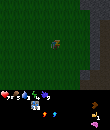

In [10]:
o = agent.wm.obs_model.decode(dreamer.prev_z)
from PIL import ImageDraw
from twm import utils
from einops import rearrange
from twm.envs.craftax import craftax_symobs_to_img
img = craftax_symobs_to_img(o.detach(), env.unwrapped.env_state).squeeze(2)[0][0][-1]
img = rearrange(img, 'h w c -> c h w') / 255.0
recon_img = utils.to_image(img)
recon_img

## Scratch

## Torchinfo

In [50]:
wm = trainer.agent.wm
obs_model = wm.obs_model
dyn_model = wm.dyn_model

o = o.detach()

wm.eval()
with torch.no_grad():
    context_z_dist = obs_model.encode(o[:, :1])
    context_z = obs_model.sample_z(context_z_dist)
    next_z_dist = obs_model.encode(o[:, -1:])
    next_logits = next_z_dist.base_dist.logits
    
z_dist = obs_model.encode(o)
z = obs_model.sample_z(z_dist, reparameterized=True)
recons = obs_model.decode(z)

# dynamics model
z = z.detach()
z = torch.cat([context_z, z], dim=1)
d = torch.logical_or(terminated, truncated)
g = wm.to_discounts(terminated)

tgt_length = 1 # z.shape[1]

preds, h, mems = dyn_model.predict(
    z[:, 1:], a, r[:, :-1], g[:, :-1], d[:, :-1], tgt_length, compute_consistency=True
)

AssertionError: 

In [48]:
z_logits = z_dist.base_dist.logits
target_logits = torch.cat(
    [z_logits[:, 1:].detach(), next_logits.detach()], dim=1
)
target_logits.shape[1]


1

In [20]:
from torchinfo import summary

agent.wm
agent.ac

batch_size = 16
summary(obs_model.encoder, input_data=o)



Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [2, 2, 8268]              --
├─MLP: 1-1                               [2, 16536]                --
│    └─Linear: 2-1                       [2, 512]                  2,097,664
│    └─SiLU: 2-2                         [2, 512]                  --
│    └─Linear: 2-3                       [2, 512]                  262,656
│    └─SiLU: 2-4                         [2, 512]                  --
│    └─Linear: 2-5                       [2, 16536]                8,482,968
├─Unflatten: 1-2                         [2, 2, 8268]              --
Total params: 10,843,288
Trainable params: 10,843,288
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 21.69
Input size (MB): 0.03
Forward/backward pass size (MB): 0.28
Params size (MB): 43.37
Estimated Total Size (MB): 43.69

In [21]:
summary(obs_model.decoder, input_data=z.flatten(0, 1))


Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               [2, 2, 8268]              --
├─MLP: 1-1                               [2, 16536]                --
│    └─Linear: 2-1                       [2, 512]                  2,097,664
│    └─SiLU: 2-2                         [2, 512]                  --
│    └─Linear: 2-3                       [2, 512]                  262,656
│    └─SiLU: 2-4                         [2, 512]                  --
│    └─Linear: 2-5                       [2, 16536]                8,482,968
├─Unflatten: 1-2                         [2, 2, 8268]              --
Total params: 10,843,288
Trainable params: 10,843,288
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 21.69
Input size (MB): 0.03
Forward/backward pass size (MB): 0.28
Params size (MB): 43.37
Estimated Total Size (MB): 43.69

In [31]:
z.shape, a.shape, g.shape, r.shape, d.shape

(torch.Size([1, 2, 4096]),
 torch.Size([1, 1]),
 torch.Size([1, 1]),
 torch.Size([1, 1]),
 torch.Size([1, 1]))

In [57]:
# {"z": z, "a": a, "r": r[:, :-1], "g": g[:, :-1]}

# tgt_length = 1 # z.shape[1]

# preds, h, mems = dyn_model.predict(
#     z[:, 1:], a, r[:, :-1], g[:, :-1], d[:, :-1], tgt_length, compute_consistency=True
# )


tgt_length = 1
summary(dyn_model.prediction_net, input_data=dict(inputs={"z": z[:, 1:], "a": a, "r": r[:, :-1], "g": g[:, :-1]}), tgt_length=tgt_length+1, stop_mask=d, heads=("z", "r", "g"), mems=None)

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [MLP: 2, Linear: 3, SiLU: 3, Embedding: 2, MLP: 2, Linear: 3, SiLU: 3]

In [ ]:
# categorial?
import torch
import torch.distributions as D
z_categoricals = 512
z_categories = 32
z_logits = torch.randn(1, 1,  z_categoricals, z_categories)
temperature = 1
z_dist = D.Independent(
            D.OneHotCategoricalStraightThrough(logits=z_logits / temperature), 1
        )
z_dist

In [ ]:
z_dist.rsample().argmax(-1)

In [ ]:
z_dist = ObservationModel.create_z_dist(z_logits)